In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

Lab Cleaning Categoricals

In [2]:
customer_df = pd.read_csv('./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv') 

In [3]:
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
customer_df = customer_df.rename(columns={'EmploymentStatus':'Employment Status'})

In [5]:
cols = [col_name.lower().replace(' ', '_') for col_name in customer_df.columns]
customer_df.columns = cols

In [6]:
print(customer_df.columns)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


In [7]:
#We should delete Customer column before plotting categoricals.
customer_df = customer_df.drop('customer',  axis=1)

In [8]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          9134 non-null   object 
 1   customer_lifetime_value        9134 non-null   float64
 2   response                       9134 non-null   object 
 3   coverage                       9134 non-null   object 
 4   education                      9134 non-null   object 
 5   effective_to_date              9134 non-null   object 
 6   employment_status              9134 non-null   object 
 7   gender                         9134 non-null   object 
 8   income                         9134 non-null   int64  
 9   location_code                  9134 non-null   object 
 10  marital_status                 9134 non-null   object 
 11  monthly_premium_auto           9134 non-null   int64  
 12  months_since_last_claim        9134 non-null   i

In [9]:
customer_df.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [10]:
numerical_df = customer_df.select_dtypes("number")
categorical_df = customer_df.select_dtypes("object")

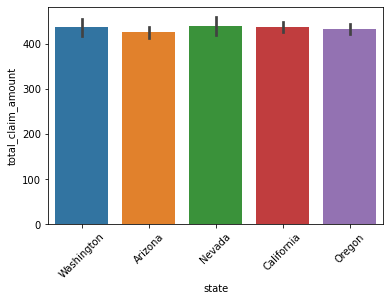

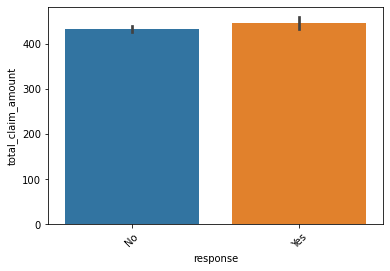

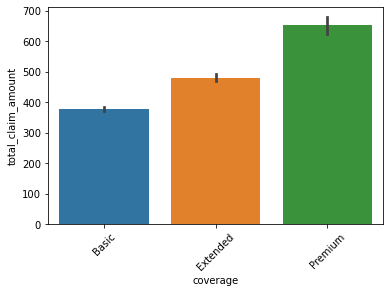

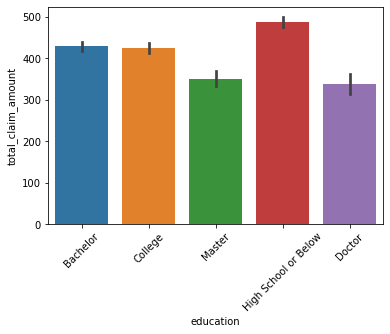

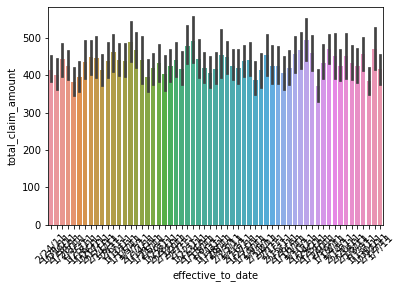

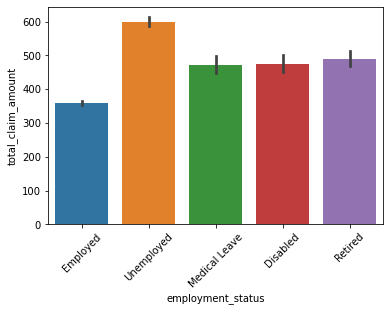

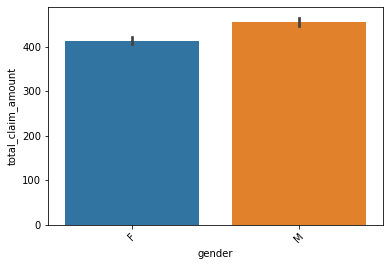

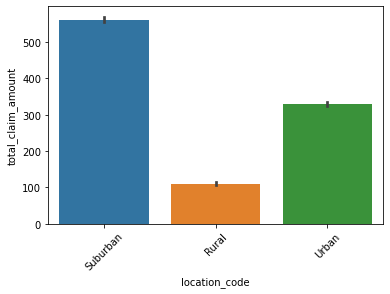

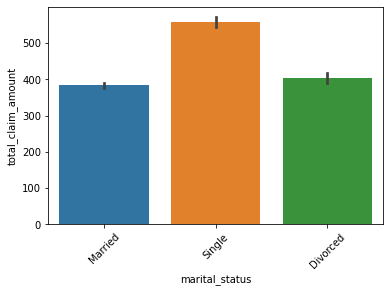

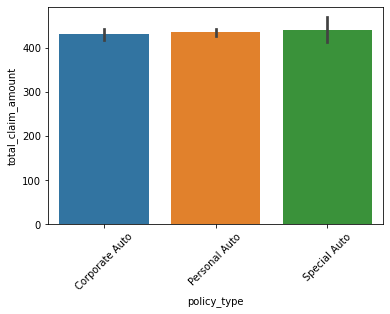

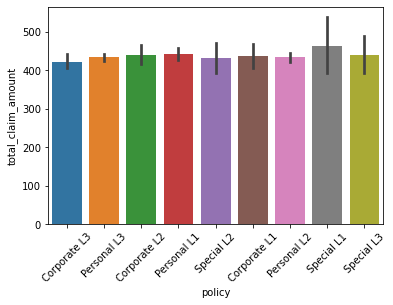

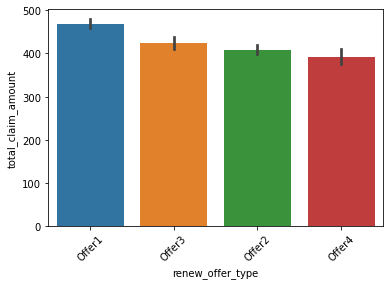

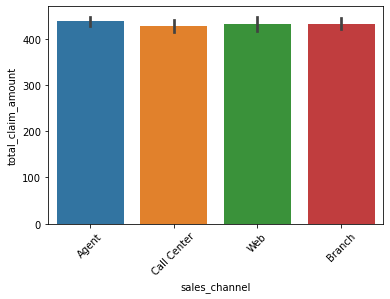

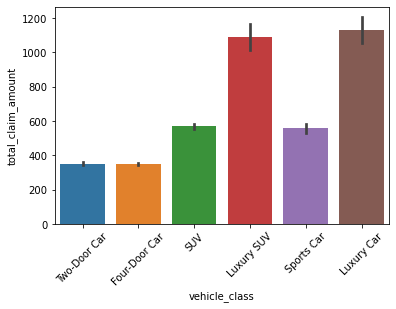

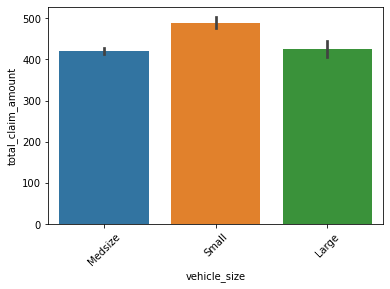

In [11]:
for column in categorical_df.columns:
    sns.barplot(x=categorical_df[column], y=numerical_df['total_claim_amount'])
    plt.xticks(rotation = 45)
    plt.show()

In [ ]:
#Premium policies have naturally a higher total claim amount(TCA). 
#People without a higher education degree appear to have a greater TCA than people with College or greater education.
#Unemployed people have around $100 higher TCA.
#Males have higher TCA than females.
#Suburban residentes have almost the double TCA higher than urban residents.
#Single people have around $150 more in TCA than married and divorced people.
#People who accept the first offer show greater TCA than those who take longer to convert.
#Naturally, Luxury SUV and Luxury Cars have a much greater TCA compared with other types of vehicles, surpassing $1000.
#Small vehicles have greater TCA than midsize and large ones.

In [12]:
for column in categorical_df.columns:
    print(column)
    display(categorical_df[column].value_counts())

state


California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

response


No     7826
Yes    1308
Name: response, dtype: int64

coverage


Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

education


Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

effective_to_date


1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/11    153
1/14/11    152
2/11/11    151
1/7/11     151
1/25/11    151
2/25/11    149
1/8/11     149
2/18/11    149
2/2/11     149
1/1/11     148
2/21/11    148
1/24/11    147
1/9/11     146
1/30/11    145
1/13/11    145
2/6/11     144
1/6/11     143
2/23/11    143
1/16/11    142
2/16/11    139
2/13/11    139
2/24/11    139
2/9/11     137
2/17/11    136
1/22/11    136
2/8/11     134
2/20/11    132
2/15/11    130
1/12/11    126
1/4/11     115
Name: effective_to_date, dtype: int64

employment_status


Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64

gender


F    4658
M    4476
Name: gender, dtype: int64

location_code


Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

marital_status


Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

policy_type


Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

policy


Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

renew_offer_type


Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

sales_channel


Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

vehicle_class


Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

vehicle_size


Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

Checking the counts of each category within a column shows the distribution of categories, which may be caused by 
many factors, including profile of customers who responded the questionnaire. Using these counts for the data cleaning
phase would be interesting if we found NaNs or empty values in those categories, which is not the case with this 
database.

Lab Feature Extraction

In [13]:
categorical_df.head()

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


state


California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

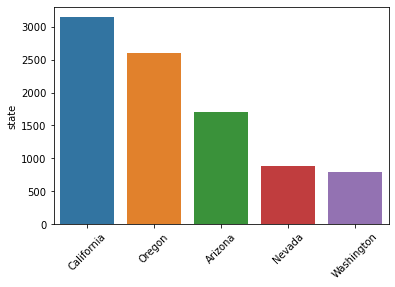

response


No     7826
Yes    1308
Name: response, dtype: int64

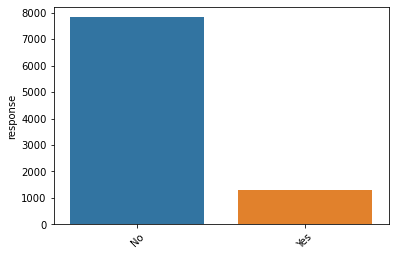

coverage


Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

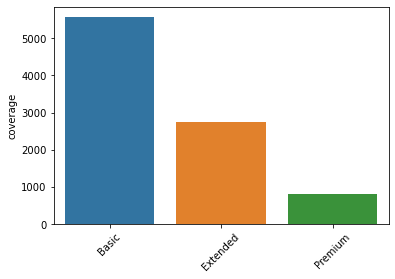

education


Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

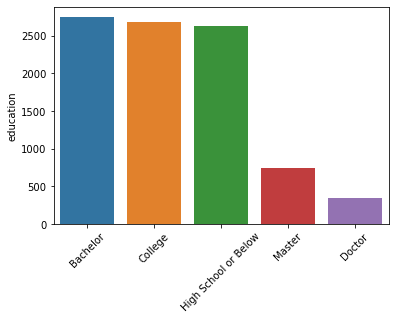

effective_to_date


1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/11    153
1/14/11    152
2/11/11    151
1/7/11     151
1/25/11    151
2/25/11    149
1/8/11     149
2/18/11    149
2/2/11     149
1/1/11     148
2/21/11    148
1/24/11    147
1/9/11     146
1/30/11    145
1/13/11    145
2/6/11     144
1/6/11     143
2/23/11    143
1/16/11    142
2/16/11    139
2/13/11    139
2/24/11    139
2/9/11     137
2/17/11    136
1/22/11    136
2/8/11     134
2/20/11    132
2/15/11    130
1/12/11    126
1/4/11     115
Name: effective_to_date, dtype: int64

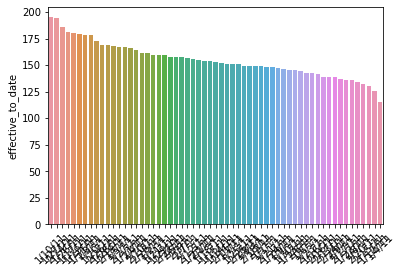

employment_status


Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64

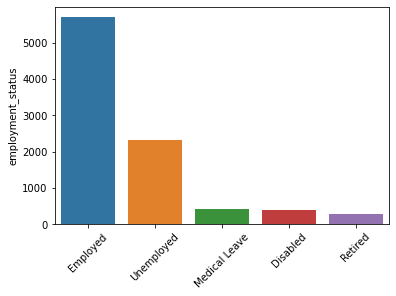

gender


F    4658
M    4476
Name: gender, dtype: int64

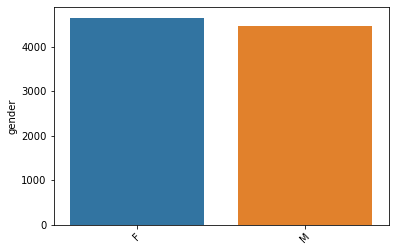

location_code


Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

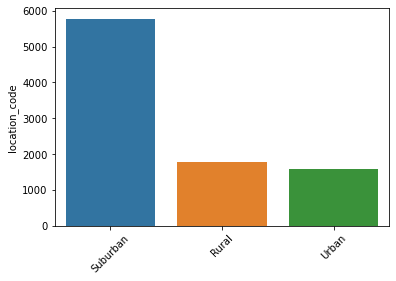

marital_status


Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

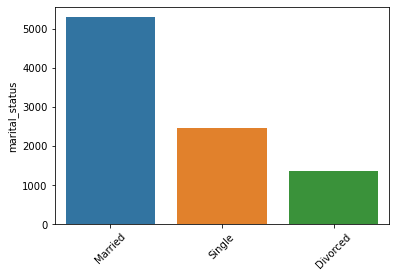

policy_type


Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

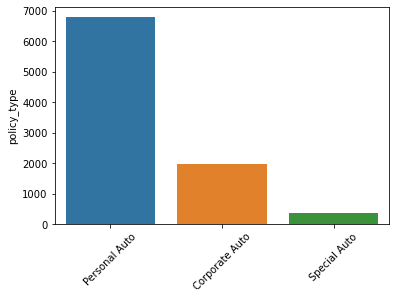

policy


Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

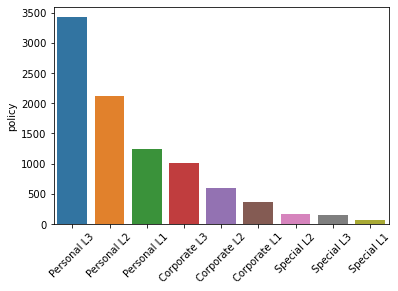

renew_offer_type


Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

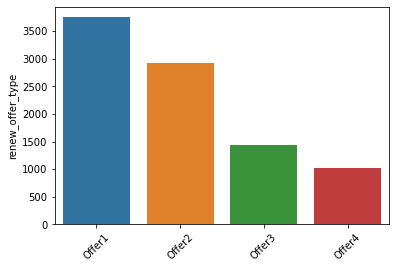

sales_channel


Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

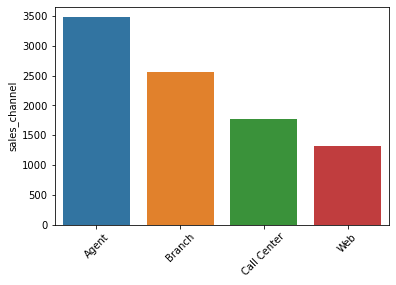

vehicle_class


Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

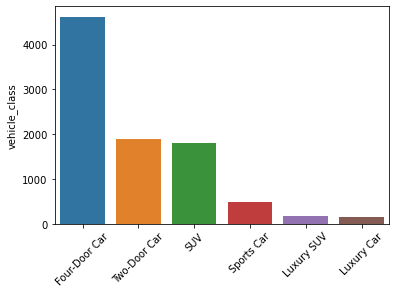

vehicle_size


Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

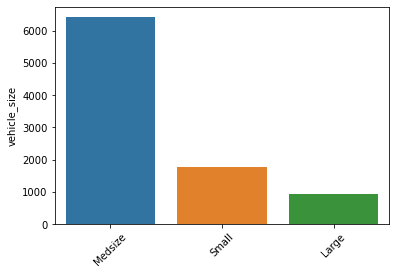

In [14]:
for column in categorical_df.columns:
    print(column)
    display(categorical_df[column].value_counts())
    sns.barplot(x=categorical_df[column].value_counts().index, y=categorical_df[column].value_counts(), data=categorical_df)
    plt.xticks(rotation = 45)
    plt.show()

*We can see that there are no NaNs or empty values in the catagorical columns. There is a high variation of 
representativity of categories values within a variable.

In [15]:
display(categorical_df['policy_type'].value_counts())

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [16]:
display(categorical_df['policy'].value_counts())

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [17]:
#policy_type and police give out the same information, with policy having more granularity. I will drop policy_type.
categorical_df = categorical_df.drop('policy_type',  axis=1)

In [18]:
display(categorical_df['vehicle_class'].value_counts())

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [19]:
display(categorical_df['vehicle_size'].value_counts())

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [20]:
#vehicle_class and vehicle_size are redundant. I will drop vehicle_size.
categorical_df = categorical_df.drop('vehicle_size',  axis=1)

In [21]:
display(categorical_df['sales_channel'].value_counts())

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [22]:
#sales_channel is redundant as it doesn't give much information about customer or their behaviour. 
#I will drop sales_channel.
categorical_df = categorical_df.drop('sales_channel',  axis=1)

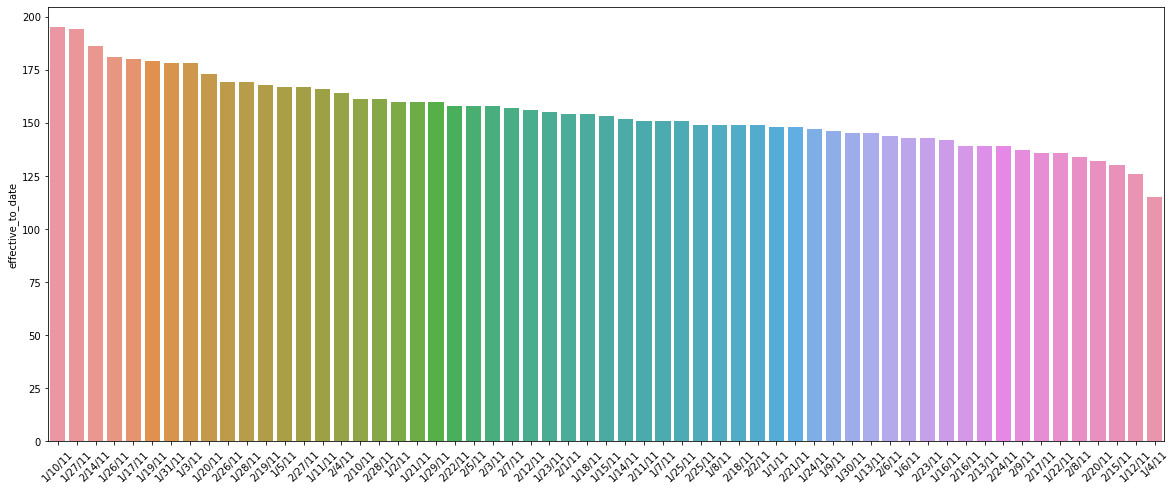

In [23]:
plt.figure(figsize=(20,8))
sns.barplot(x=categorical_df['effective_to_date'].value_counts().index, y=categorical_df['effective_to_date'].value_counts(), data=categorical_df)
plt.xticks(rotation = 45)
plt.show()

*effective_to_date doesn't give much information, maybe only how long customers still have their current police. 

Lab Data Cleaning and Wrangling

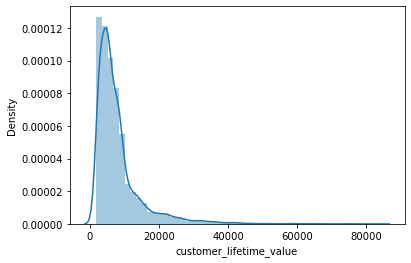

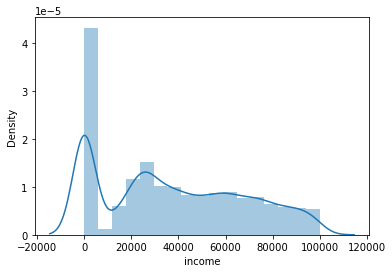

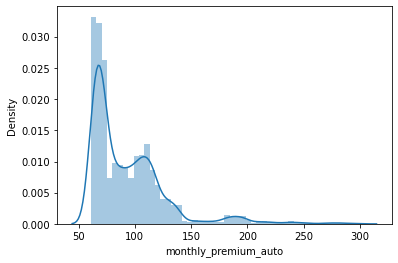

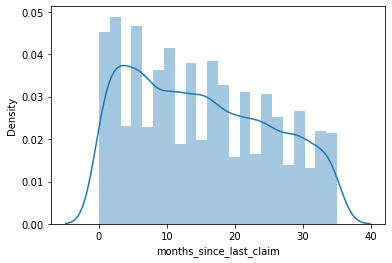

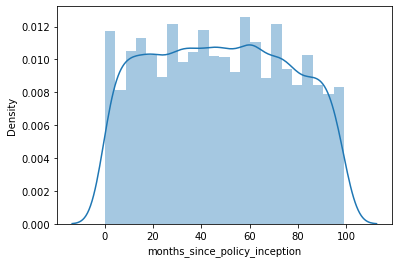

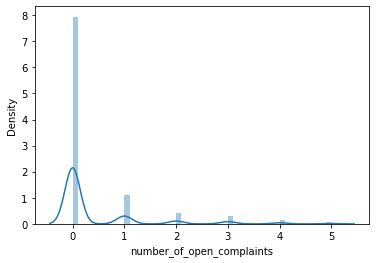

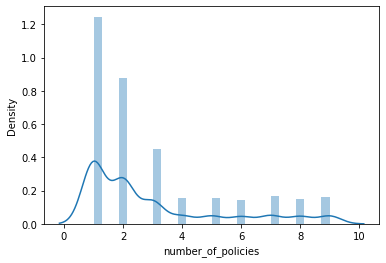

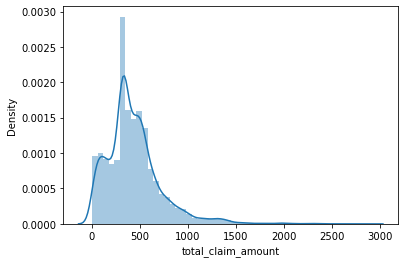

In [24]:
for column in numerical_df.columns:
    sns.distplot(numerical_df[column])
    plt.show()

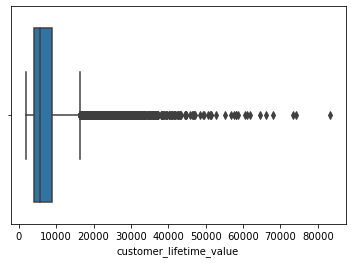

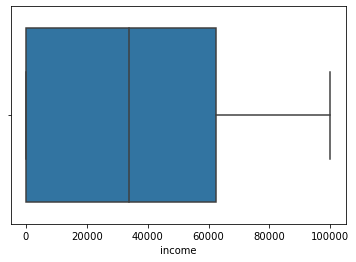

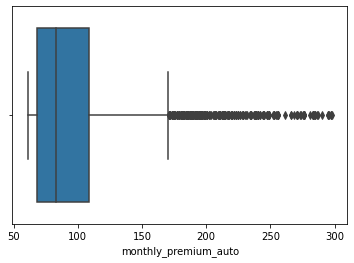

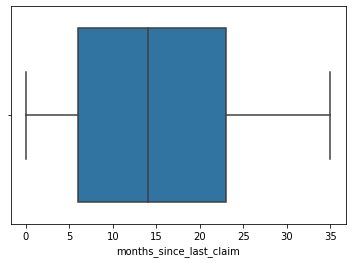

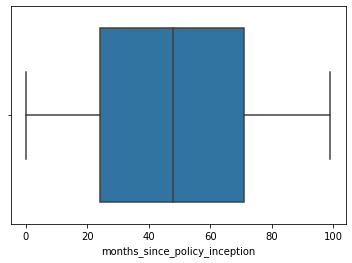

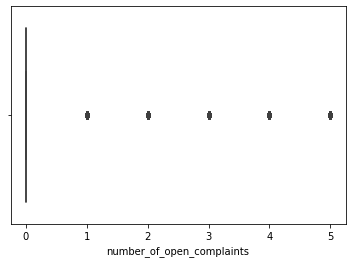

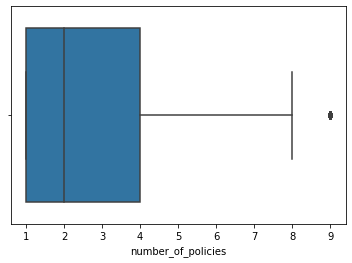

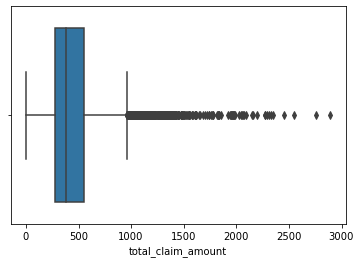

In [25]:
for column in numerical_df.columns:
    sns.boxplot(numerical_df[column])
    plt.show()

In [26]:
numerical_df_2 = numerical_df.copy()

In [27]:
#I will use log transformation to normalize numerical variables
def log_transfom_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN 

In [28]:
numerical_df_2['customer_lifetime_value'] = list(map(log_transfom_clean, numerical_df_2['customer_lifetime_value']))

In [29]:
numerical_df_2['customer_lifetime_value'] = numerical_df_2['customer_lifetime_value'].fillna(np.mean(numerical_df_2['customer_lifetime_value'])) 

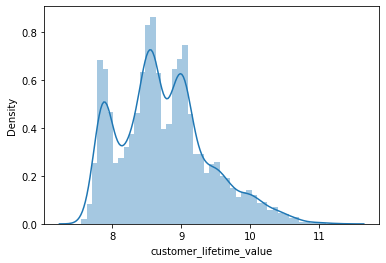

In [30]:
sns.distplot(numerical_df_2['customer_lifetime_value'])
plt.show()

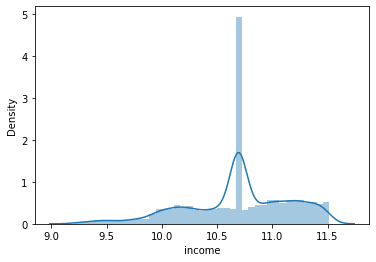

In [31]:
numerical_df_2['income'] = list(map(log_transfom_clean, numerical_df_2['income']))
numerical_df_2['income'] = numerical_df_2['income'].fillna(np.mean(numerical_df_2['income'])) 

sns.distplot(numerical_df_2['income'])
plt.show()

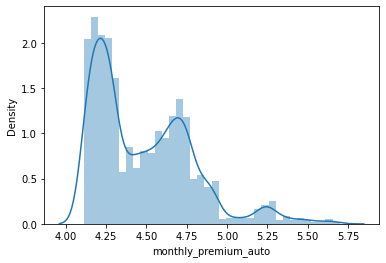

In [32]:
numerical_df_2['monthly_premium_auto'] = list(map(log_transfom_clean, numerical_df_2['monthly_premium_auto']))
numerical_df_2['monthly_premium_auto'] = numerical_df_2['monthly_premium_auto'].fillna(np.mean(numerical_df_2['monthly_premium_auto'])) 

sns.distplot(numerical_df_2['monthly_premium_auto'])
plt.show()

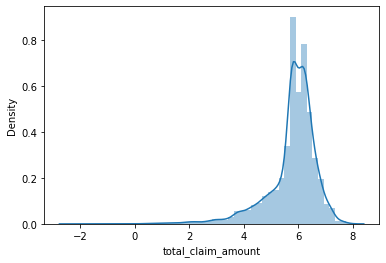

In [33]:
numerical_df_2['total_claim_amount'] = list(map(log_transfom_clean, numerical_df_2['total_claim_amount']))
numerical_df_2['total_claim_amount'] = numerical_df_2['total_claim_amount'].fillna(np.mean(numerical_df_2['total_claim_amount'])) 

sns.distplot(numerical_df_2['total_claim_amount'])
plt.show()

In [34]:
#month_since_last_claim, months_since_policy_inception, number_of_open_complaints and number_of_polices don't seem 
#to have big outliers.

In [35]:
categorical_df_2 = categorical_df.copy()
categorical_df_2

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy,renew_offer_type,vehicle_class
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate L3,Offer1,Two-Door Car
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal L3,Offer3,Four-Door Car
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal L3,Offer1,Two-Door Car
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate L2,Offer1,SUV
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal L1,Offer1,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal L1,Offer2,Four-Door Car
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate L3,Offer1,Four-Door Car
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate L2,Offer1,Four-Door Car
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal L2,Offer3,Four-Door Car


In [36]:
categorical_df_2["coverage"] = categorical_df_2["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
categorical_df_2["employment_status"] = categorical_df_2["employment_status"].map({"Employed" : 0, "Unemployed" : 1, "Medical Leave" : 2, "Disabled" : 3, "Retired" : 4})
categorical_df_2["location_code"] = categorical_df_2["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})

In [37]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(categorical_df_2[{"state", "response", "education", "gender", "marital_status", "policy", "renew_offer_type", "vehicle_class"}])

OneHotEncoder(drop='first')

In [38]:
encoded = encoder.transform(categorical_df_2[{"state", "response", "education", "gender", "marital_status", "policy", "renew_offer_type", "vehicle_class"}])#.toarray()


In [40]:
categorical_df_2['month'] = pd.DatetimeIndex(categorical_df_2['effective_to_date']).month

In [41]:
month_column = categorical_df_2.pop('month')
categorical_df_2.insert(4, 'month', month_column)

In [42]:
categorical_df_2 = categorical_df_2.drop('effective_to_date',  axis=1)

In [43]:
categorical_df_2 = categorical_df_2.rename(columns={'month':'effective_to_date'})

In [44]:
categorical_df_2

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy,renew_offer_type,vehicle_class
0,Washington,No,0,Bachelor,2,0,F,0,Married,Corporate L3,Offer1,Two-Door Car
1,Arizona,No,1,Bachelor,1,1,F,0,Single,Personal L3,Offer3,Four-Door Car
2,Nevada,No,2,Bachelor,2,0,F,0,Married,Personal L3,Offer1,Two-Door Car
3,California,No,0,Bachelor,1,1,M,0,Married,Corporate L2,Offer1,SUV
4,Washington,No,0,Bachelor,2,0,M,1,Single,Personal L1,Offer1,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,0,Bachelor,2,0,M,2,Married,Personal L1,Offer2,Four-Door Car
9130,California,Yes,1,College,2,0,F,0,Divorced,Corporate L3,Offer1,Four-Door Car
9131,California,No,1,Bachelor,2,1,M,0,Single,Corporate L2,Offer1,Four-Door Car
9132,California,No,1,College,2,0,M,0,Married,Personal L2,Offer3,Four-Door Car
